In [28]:
# Testing Likeness Coefficient from Saylor and Sundell paper, 2016

In [170]:
from scipy import stats
from scipy.stats import gaussian_kde
from scipy import signal
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [171]:
def kde_stuff(file_name, width, height, bw, lower, upper, nums, colorList):
    # Creates a pandas data frame from an excel file and a specified column
    df = pd.read_excel(file_name)
    # Creates a list of the columns in the data frame
    column_list = df.columns.tolist()
    # List comprehension creating a list of the non-error columns in the data frame
    newList = [column for column in column_list if 'Error' not in column]
    # Provies length of newList; used later on during plotting
    num_samples = len(newList)

    # Joins corresponding values in newList and colorList and iterates through them
    for column, the_color in zip(newList, colorList):
        # Eliminates all NaN entries in a specified column of the data frame
        data = df[column].dropna()
        # Arranges data into a KDE object that is used to create arrays necessary to plot the KDE
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        # Plots histogram and KDE
        ax.plot(x_vals, density, color=the_color)
    # Labels the x-axis
    plt.xlabel('Age (Ma)')

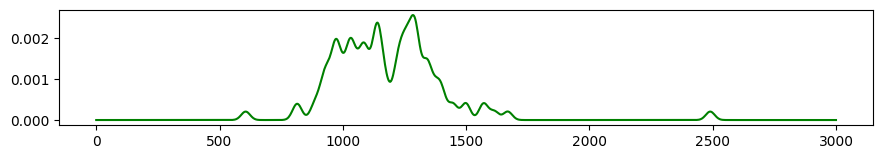

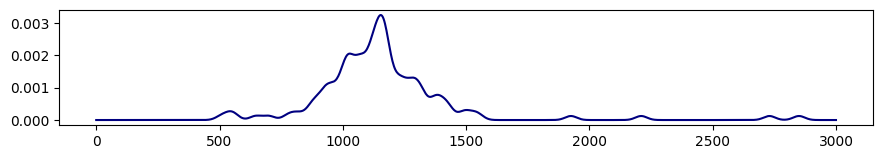

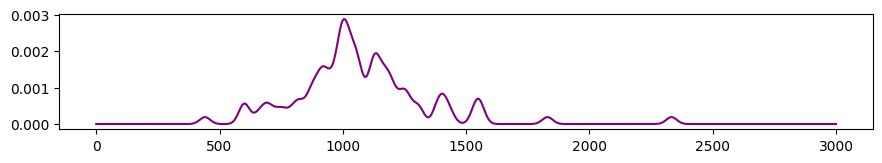

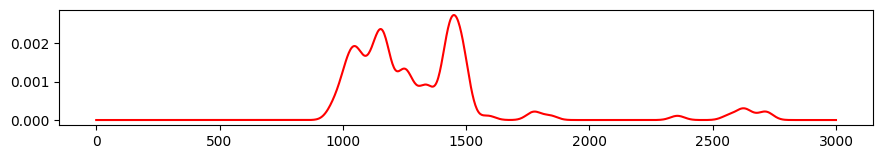

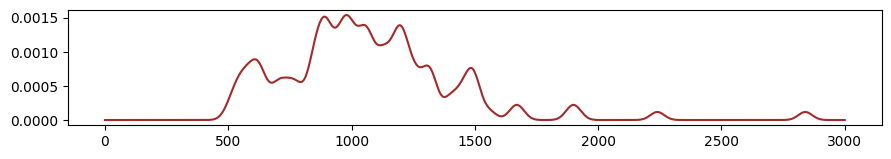

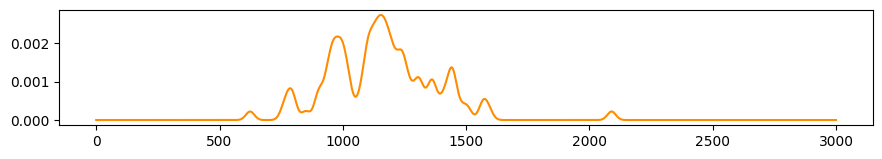

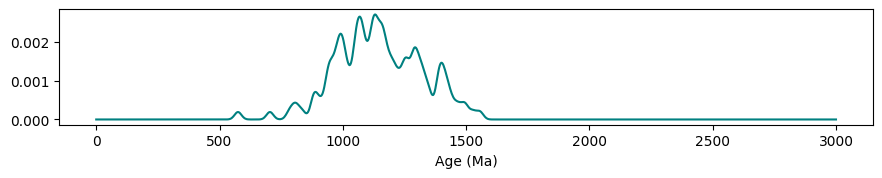

In [172]:
kde_stuff('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, ['green','navy','purple','red','brown','darkorange','teal'])

In [173]:
# To Julia- look at this function!
def similar(file_name, col_name1, col_name2, bw, lower, upper, nums):
    df = pd.read_excel(file_name)
    column_list = df.columns.tolist()
    if col_name1 in column_list and col_name2 in column_list:
        pass
    else:
        return None
    column_duet = [col_name1, col_name2]
    new_list = []
    for column in column_duet:
        data = df[column].dropna()
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        new_list.append(density)
    new_tuple = tuple(new_list)
    the_sum = 0
    for d1, d2 in zip(new_tuple[0], new_tuple[1]):
        the_sum += np.sqrt(d1 * d2)
    return the_sum

In [174]:
similar('ForAgeCalc.xlsx', 'RNHW', 'RNHE', 0.08, 0, 3000, 1000)

np.float64(0.3071237905919832)

In [175]:
# To Julia- look at this function!
def likeness(file_name, col_name1, col_name2, bw, lower, upper, nums):
    df = pd.read_excel(file_name)
    column_list = df.columns.tolist()
    if col_name1 in column_list and col_name2 in column_list:
        pass
    else:
        return None
    column_duet = [col_name1, col_name2]
    new_list = []
    for column in column_duet:
        data = df[column].dropna()
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        new_list.append(density)
    new_tuple = tuple(new_list)
    the_sum = 0
    for d1, d2 in zip(new_tuple[0], new_tuple[1]):
        the_sum += abs(d1 - d2)
    return 1 - (the_sum/2)

In [193]:
likeness('ForAgeCalc.xlsx', 'Gilder GS-11', 'RNHE', 0.08, 0, 3000, 1000)

np.float64(0.9015365415445831)

In [194]:
def K(x, xi, h):
    return np.exp(-0.5*((x - xi)**2) / (h**2))* (1/h*np.sqrt(2*np.pi))

def likeness_new(file_name, col_name1, col_name2, c, lower, upper, nums):
    df = pd.read_excel(file_name)
    column_list = df.columns.tolist()
    if col_name1 in column_list and col_name2 and col_name1 + ' Error' and col_name2 + ' Error' in column_list:
        pass
    else:
        return None
    column_duet = [col_name1, col_name2]
    error1 = col_name1 + ' Error'
    error2 = col_name2 + ' Error'
    error_duet = [error1, error2]
    new_list = []
    
    for col, err in zip(column_duet, error_duet):
        mask = ~np.isnan(df[col]) & ~np.isnan(df[err])
        data = df[col][mask]
        errors = df[err][mask]
        error_max = max(errors)
        x_vals = np.linspace(lower, upper, nums)
        total_sum = np.zeros_like(x_vals)
        
        for xi, e in zip(data, errors):
            # Sets the bandwidth (h) equal to the square root of error_max times by a c-value slightly greater than 1
            # squared minus e squared
            h = np.sqrt((c*error_max)**2 - (e)**2)
            # Runs x_vals - xi divided by h through the previously defined KDE function
            # Adds the result of this calculation to the array in total_sum
            total_sum += K(x_vals, xi, h)
        # Completes the KDE function by dividing total_sum by h times the number of data points in the column
        y_vals = total_sum/len(data)
        new_list.append(y_vals)
    new_tuple = tuple(new_list)
    the_sum = 0
    for d1, d2 in zip(new_tuple[0], new_tuple[1]):
        the_sum += abs(d1 - d2)
    return 1 - (the_sum/2)

In [204]:
likeness_new('ForAgeCalc.xlsx', 'Gilder GS-11', 'RNHW', 1.02, 0, 3000, 1000)

np.float64(0.49379431222370584)

In [205]:
likeness_new('ForAgeCalc.xlsx', 'Gilder GS-11', 'RNHE', 1.02, 0, 3000, 1000)

np.float64(0.44434248060833714)

In [197]:
likeness_new('ForAgeCalc.xlsx', 'Gilder GS-11', 'NY14-TAP-22', 1.02, 0, 3000, 1000)

np.float64(0.405686293648419)

In [201]:
likeness_new('ForAgeCalc.xlsx', 'Gilder GS-11', 'E79', 1.02, 0, 3000, 1000)

np.float64(0.27317223515532185)

In [202]:
likeness_new('ForAgeCalc.xlsx', 'Gilder GS-11', 'PB', 1.02, 0, 3000, 1000)

np.float64(0.8911694383172828)

In [203]:
likeness_new('ForAgeCalc.xlsx', 'Gilder GS-11', 'FL3', 1.02, 0, 3000, 1000)

np.float64(0.6427524847268429)

In [206]:
likeness_new('ForAgeCalc.xlsx', 'RNHW', 'RNHE', 1.02, 0, 3000, 1000)

np.float64(0.8314190651219564)

In [207]:
likeness_new('ForAgeCalc.xlsx', 'RNHW', 'NY14-TAP-22', 1.02, 0, 3000, 1000)

np.float64(0.11438680048123617)

In [211]:
likeness_new('ForAgeCalc.xlsx', 'RNHW', 'E79', 1.02, 0, 3000, 1000)

np.float64(0.7420522428496872)

In [213]:
likeness_new('ForAgeCalc.xlsx', 'RNHW', 'PB', 1.02, 0, 3000, 1000)

np.float64(0.5805727462852195)

In [214]:
likeness_new('ForAgeCalc.xlsx', 'RNHW', 'FL3', 1.02, 0, 3000, 1000)

np.float64(0.20748731044633084)

In [215]:
likeness_new('ForAgeCalc.xlsx', 'RNHE', 'NY14-TAP-22', 1.02, 0, 3000, 1000)

np.float64(0.03550159027014643)

In [216]:
likeness_new('ForAgeCalc.xlsx', 'RNHE', 'E79', 1.02, 0, 3000, 1000)

np.float64(0.7871829917980636)

In [217]:
likeness_new('ForAgeCalc.xlsx', 'RNHE', 'PB', 1.02, 0, 3000, 1000)

np.float64(0.53266484358376)

In [218]:
likeness_new('ForAgeCalc.xlsx', 'RNHE', 'FL3', 1.02, 0, 3000, 1000)

np.float64(0.16678884819300133)

In [219]:
likeness_new('ForAgeCalc.xlsx', 'NY14-TAP-22', 'E79', 1.02, 0, 3000, 1000)

np.float64(-0.09657666915398311)

In [220]:
likeness_new('ForAgeCalc.xlsx', 'NY14-TAP-22', 'PB', 1.02, 0, 3000, 1000)

np.float64(0.3644037893100198)

In [221]:
likeness_new('ForAgeCalc.xlsx', 'NY14-TAP-22', 'FL3', 1.02, 0, 3000, 1000)

np.float64(0.4440536227589431)

In [223]:
likeness_new('ForAgeCalc.xlsx', 'E79', 'PB', 1.02, 0, 3000, 1000)

np.float64(0.3537941447817661)

In [224]:
likeness_new('ForAgeCalc.xlsx', 'E79', 'FL3', 1.02, 0, 3000, 1000)

np.float64(0.001945195365204988)

In [225]:
likeness_new('ForAgeCalc.xlsx', 'PB', 'FL3', 1.02, 0, 3000, 1000)

np.float64(0.5902437029640943)

In [200]:
likeness_new('ForAgeCalc.xlsx', 'NY14-TAP-22', 'RNHE', 1.02, 0, 3000, 1000)

np.float64(0.03550159027014643)

In [178]:
df = pd.read_excel('ForAgeCalc.xlsx')
data1 = df['PB'].dropna()
data2 = df['FL3'].dropna()
kde1 = gaussian_kde(data1, bw_method=0.08)
kde2 = gaussian_kde(data2, bw_method=0.08)
x_vals = np.linspace(min(data1.min(), data2.min()) - 1, max(data1.max(), data2.max()) + 1, 500)
density1 = kde1(x_vals)
density2 = kde2(x_vals)

In [179]:
# To Julia- look at this function! (This is the cross-correlation function that I'm probably going to be using).
def cross_corr_coefficient(file_name, col_name1, col_name2, bw, lower, upper, nums):
    df = pd.read_excel(file_name)
    data1 = df[col_name1].dropna()
    data2 = df[col_name2].dropna()
    x_vals = np.linspace(min(data1.min(), data2.min()) - 1, max(data1.max(), data2.max()) + 1, nums)
    cross_corr = signal.correlate(data1, data2, mode='full')
    norm_factor = np.sqrt(np.sum(np.abs(data1)**2) * np.sum(np.abs(data2)**2))
    norm_cross_corr = cross_corr/norm_factor
    r = max(norm_cross_corr)
    return r**2

In [180]:
cross_corr_coefficient('ForAgeCalc.xlsx', 'NY14-TAP-22', 'Gilder GS-11', 0.08, 0, 3000, 500)

np.float64(0.753414601931454)

In [181]:
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_corr(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff
    return diffprod / np.sqrt(xdiff2 * ydiff2)

In [184]:
def correlation(file_name, col_name1, col_name2, bw, nums):
    df = pd.read_excel(file_name)
    data1 = df[col_name1].dropna()
    data2 = df[col_name2].dropna()
    kde1 = gaussian_kde(data1, bw_method=bw)
    kde2 = gaussian_kde(data2, bw_method=bw)
    x_vals = np.linspace(min(data1.min(), data2.min()) - 1, max(data1.max(), data2.max()) + 1, nums)
    density1 = kde1(x_vals)
    density2 = kde2(x_vals)
    cross_corr = np.correlate(data1, data2, mode='full')
    return cross_corr

In [185]:
correlation('ForAgeCalc.xlsx', 'FL3', 'NY14-TAP-22', 0.08, 500)

array([6.42490024e+05, 1.34318368e+06, 2.39839048e+06, 3.36585529e+06,
       4.51239219e+06, 6.41750470e+06, 7.90742652e+06, 9.50794539e+06,
       1.06888128e+07, 1.17561751e+07, 1.29443515e+07, 1.42270782e+07,
       1.57387621e+07, 1.71303369e+07, 1.82900887e+07, 1.93227956e+07,
       2.06461156e+07, 2.17922493e+07, 2.30798452e+07, 2.42316962e+07,
       2.62405262e+07, 2.76859716e+07, 2.90989446e+07, 3.05070503e+07,
       3.17371699e+07, 3.29050985e+07, 3.41223502e+07, 3.53027710e+07,
       3.66238258e+07, 3.80063311e+07, 3.93118287e+07, 4.04833039e+07,
       4.18654638e+07, 4.32987958e+07, 4.47629118e+07, 4.60440118e+07,
       4.72261321e+07, 4.84151005e+07, 4.95714757e+07, 5.09642164e+07,
       5.22940112e+07, 5.36315760e+07, 5.48949705e+07, 5.61368849e+07,
       5.75840647e+07, 5.88269304e+07, 6.01104573e+07, 6.15061826e+07,
       6.29098025e+07, 6.43983119e+07, 6.59247311e+07, 6.72125941e+07,
       6.86960834e+07, 7.02014445e+07, 7.17134995e+07, 7.30087797e+07,
      